In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

## Análise de Dados Titanic

 ### Fontes dos dados

Os dados necessários para nossa análise e construção do modelo foram obtidos da página do desafio do Titanic no Kaggle. `https://www.kaggle.com/datasets/rahulsah06/titanic?select=train.csv`

* **Conjunto de Treinamento (train.csv):** Este conjunto contém várias informações sobre os passageiros do Titanic, como gênero, classe de embarque, idade, entre outros. Além disso, ele inclui a informação crucial de se o passageiro sobreviveu ou não. Vamos usar esses dados para desenvolver e treinar nosso modelo de machine learning.

* **Conjunto de Teste (test.csv):** Diferentemente do conjunto de treinamento, este dataset não contém informações sobre a sobrevivência dos passageiros. Ele será utilizado como um conjunto de dados que o modelo nunca viu antes, permitindo-nos avaliar o desempenho do modelo ao fazer previsões sobre a sobrevivência com base nesses dados desconhecidos.



## Análise Exploratória

In [ ]:
# Definindo conjutos de dados
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [ ]:
# Visusalizanso DataSet
treino.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Definição de cada variável para um melhor entendimento.

* **PassengerID**: É um número de identificação único para cada passageiro.
* **Survived**: Indica se o passageiro sobreviveu ou não ao naufrágio, onde 0 significa "não sobreviveu" e 1 significa "sobreviveu".
* **Pclass**: Refere-se à classe do bilhete do passageiro, com 1 representando a 1ª classe, 2 representando a 2ª classe e 3 representando a 3ª classe.
* **Name**: É o nome do passageiro.
* **Sex**: Indica o sexo do passageiro, ou seja, se é masculino ou feminino.
* **Age**: Representa a idade do passageiro.
* **SibSp**: Mostra a quantidade de cônjuges e/ou irmãos a bordo do Titanic.
* **Parch**: Indica a quantidade de pais e filhos a bordo do navio.
* **Ticket**: É o número da passagem.
* **Fare**: Refere-se ao preço da passagem.
* **Cabin**: É o número da cabine do passageiro, quando disponível.
* **Embarked**: Indica o porto de embarque do passageiro, onde 'C' é Cherbourg, 'Q' é Queenstown e 'S' é Southampton.


Shape do conjunto de dados.

In [ ]:
print('Colunas: ', treino.shape[1])
print('Linhas: ', treino.shape[0])

Colunas:  12
Linhas:  891


Tipo das variáveis.

In [ ]:
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Verificando se há dados nulos.

In [ ]:
treino.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dentro das variáveis fornecidas, a "Age" pode ser a mais desafiadora ao implementar um modelo de machine learning, porque representa uma característica direta dos passageiros e desempenha um papel fundamental em nossa análise exploratória.

### Descrevendo as estatística dos dados.

In [ ]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As estatísticas apresentada acima, podemos observar os principais parâmetros estatísticos das variáveis numéricas em nosso conjunto de dados. No entanto, é importante destacar que, para o propósito de nossa análise, estamos particularmente interessados nas variáveis Pclass, Age, SibSp, Parch e Fare.

### Verificando a existencia de outliers

Outliers, quando presentes, têm o potencial de exercer um impacto significativo e prejudicial em qualquer análise conduzida no conjunto de dados, levando a problemas sérios nos resultados obtidos.

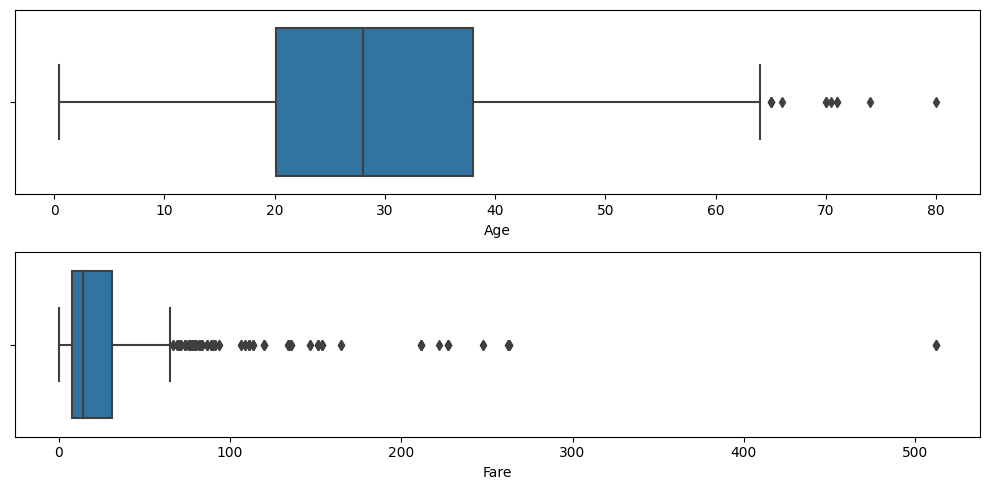

In [ ]:
fig, (axis1, axis2) = plt.subplots(2,1, figsize = (10,5))
sns.boxplot(data = treino, x = 'Age', ax = axis1)
sns.boxplot(data = treino, x = 'Fare', ax = axis2)
plt.tight_layout()

Depois de coletar algumas informações iniciais do conjunto de dados, podemos fazer perguntas mais detalhadas e específicas. Por exemplo, podemos querer entender como a chance de sobrevivência está relacionada com coisas como a classe em que o passageiro embarcou, o sexo, a idade, entre outros fatores. Ou seja, queremos investigar como essas características específicas podem influenciar a probabilidade de uma pessoa sobreviver ao desastre do Titanic.

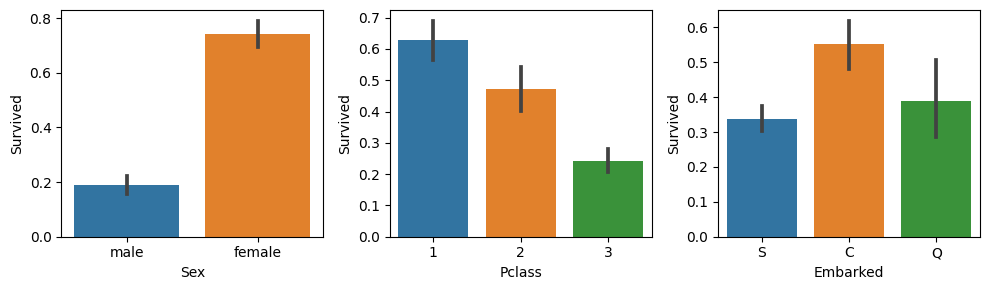

In [ ]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (10,3))

sns.barplot(data = treino, x = 'Sex', y = 'Survived', ax = axis1)
sns.barplot(data = treino, x = 'Pclass', y = 'Survived', ax = axis2)
sns.barplot(data = treino, x = 'Embarked', y = 'Survived', ax = axis3)

plt.tight_layout()

As mulheres têm muito mais chances de sobreviver do que os homens. Cerca de 75% das mulheres sobreviveram, enquanto apenas cerca de 18% dos homens sobreviveram.

As pessoas que viajaram na 1ª Classe têm mais do que o dobro de chances de sobreviver em comparação com aquelas que viajaram na 3ª Classe.

Além disso, notamos que as pessoas que embarcaram em Cherbourg têm as maiores chances de sobrevivência, enquanto aquelas que embarcaram em Southampton têm as menores chances.

Essas conclusões se aplicam a todos os casos individuais, independentemente da classe de viagem ou cidade de embarque. Ou seja, as mulheres tiveram uma alta taxa de sobrevivência em todas as situações.

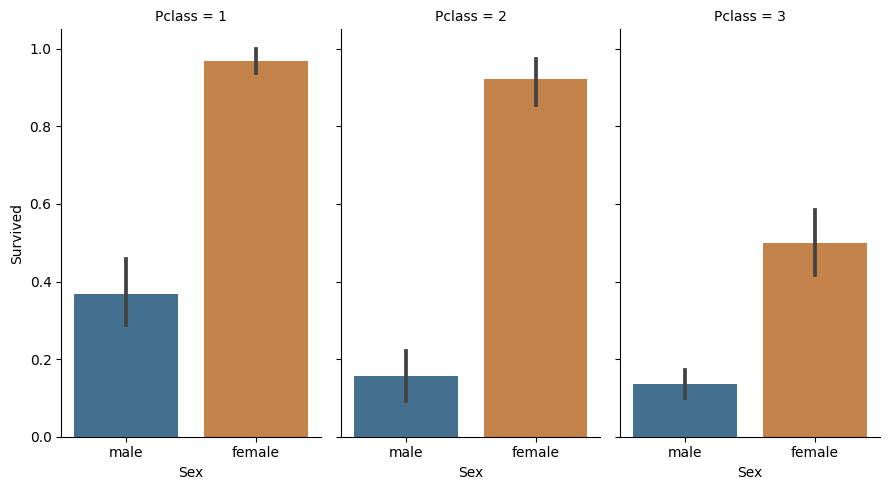

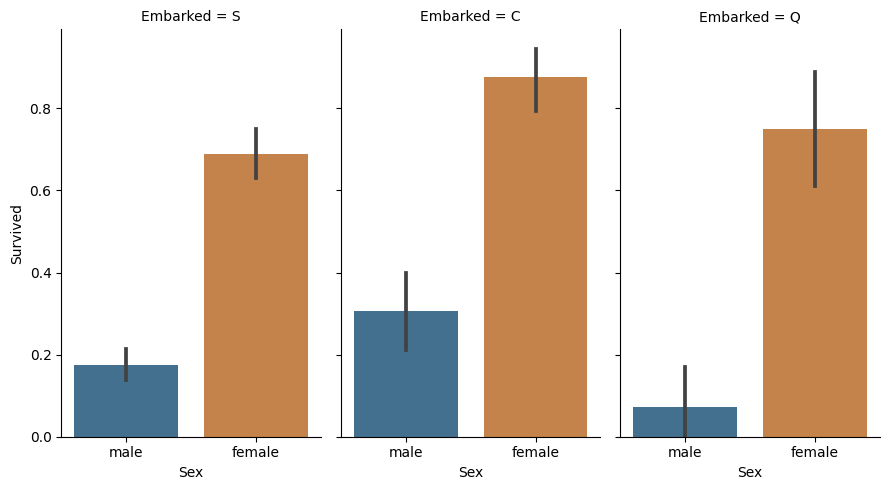

In [ ]:
sns.catplot(x="Sex", y="Survived", col="Pclass", data=treino, saturation=0.5, kind="bar", aspect=0.6)
sns.catplot(x="Sex", y="Survived", col="Embarked", data=treino, saturation=0.5, kind="bar", aspect=0.6)
plt.tight_layout()

plt.show()

Análise em relação às idades dos passageiros.

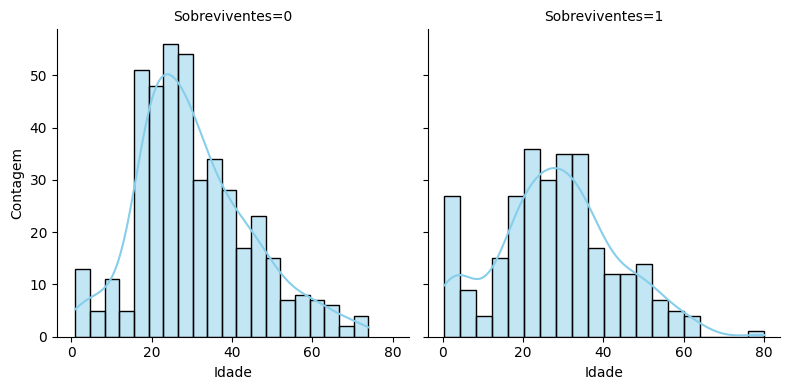

In [ ]:
grid = sns.FacetGrid(treino, col='Survived', height=4)
grid.map(sns.histplot, 'Age', bins=20, kde=True, color='skyblue')
grid.set_axis_labels('Idade', 'Contagem')
grid.set_titles(col_template='Sobreviventes={col_name}')
plt.tight_layout()


## Tratando Dados para os Algoritimos de Machine Learning

In [ ]:
# SALVANDO OS ÍNDICES PARA RECUPERAÇÃO DOS CONJUNTOS DE DADOS

treino_ID = treino.shape[0]
teste_ID = teste.shape[0]

In [ ]:
# SALVANDO O 'PASSANGERID' PARA SUBMISSÃO NO KAGGLE
Passenger_ID = teste.PassengerId

In [ ]:
# SALVANDO VARIÁVEL ALVO (TARGET) E SEPARANDO DO DATASET DE TREINO
target = treino['Survived'].copy()
treino.drop(['Survived'], axis = 1, inplace = True)

In [ ]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# JUNTANDO OS CONJUNTOS DE DADOS
df_total = pd.concat(objs = [treino, teste], axis = 0).reset_index(drop = True)

In [ ]:
df_total

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Escolhendo as variáves importantes do conjunto de dados.

Para este projeto, estamos nos concentrando em apenas algumas variáveis-chave: a classe do bilhete (Pclass), o sexo (Sex), a idade (Age), a quantidade de irmãos/cônjuges a bordo (SibSp), a quantidade de pais/filhos a bordo (Parch), o preço da passagem (Tarifa) e o porto de embarque (Embarked).

In [ ]:
# REMOVENDO AS VARIÁVEIS IRRELEVANTES
df_total.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
df_total.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Tratando os Valores Ausentes

A presença de valores faltantes nos dados afeta análises e modelos. Devemos tratar esses valores, seja removendo-os ou substituindo-os de forma adequada, para garantir resultados precisos.

In [ ]:
df_total.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Os valores ausentes nas variáveis Age e Fare serão substituídos pelas medianas, enquanto na variável Embarked será utilizado o valor mais frequente para preencher os dados faltantes.

In [ ]:
# MEDIANA DA COLUNA 'AGE'
Age_mediana = df_total['Age'].median()
df_total['Age'].fillna(Age_mediana, inplace = True)

In [ ]:
# MEDIANA DA COLUNA 'FARE'
Fare_mediana = df_total['Fare'].median()
df_total['Fare'].fillna(Fare_mediana, inplace = True)

In [ ]:
# VERIFICANDO O VALOR MAIS FREQUENTE DA COLUNA 'EMBARKED'
df_total['Embarked'].mode()

# SUBSTITUINDO O VALOR
df_total['Embarked'].fillna('S', inplace = True)

In [ ]:
df_total.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Convertendo as variáveis categóricas em numéricas.

Neste caso, as variáveis 'Sex' e 'Embarked' serão transformadas em valores numéricos. Isso é importante porque muitos modelos de machine learning requerem entradas numéricas em vez de categóricas.

In [ ]:
# TRANSFORMANDO AS VARIÁVEIS PARA NUMÉRICAS

df_total['Sex'] = df_total['Sex'].map({'male' : 1, 'female' : 0})

df_total['Embarked'] = df_total['Embarked'].astype('category')
df_total['Embarked'] = df_total['Embarked'].cat.codes

In [ ]:
# calculando desvio padrão
desviop_age = sts.stdev(df_total['Age'])
# substituindo os valores do outliers pelo valor da mediana
df_total.loc[df_total['Age'] >= desviop_age, 'Age'] = Age_mediana

In [ ]:
# calculando desvio padrão
desviop_fare = sts.stdev(df_total['Fare'])
# substituindo os valores do outliers pelo valor da mediana
df_total.loc[df_total['Fare'] >= desviop_fare, 'Fare'] = Fare_mediana

In [ ]:
df_total

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,28.0,1,0,7.2500,2
1,1,0,28.0,1,0,14.4542,0
2,3,0,28.0,0,0,7.9250,2
3,1,0,28.0,1,0,14.4542,2
4,3,1,28.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
1304,3,1,28.0,0,0,8.0500,2
1305,1,0,28.0,0,0,14.4542,0
1306,3,1,28.0,0,0,7.2500,2
1307,3,1,28.0,0,0,8.0500,2


Após realizar as modificações nos dados, estamos dividindo novamente os conjuntos de treinamento e teste usando os índices "treino_ID" e "teste_ID" que foram definidos anteriormente. Essa separação nos permite obter os dados de treinamento e teste de forma consistente para continuar com as etapas de modelagem e avaliação do modelo.

In [ ]:
# SEPARANDO OS CONJUNTOS DE DADOS

treino = df_total.iloc[:treino_ID]
teste = df_total.iloc[treino_ID:]

# Algoritmos de classificação

## 1NN

A acurácia do modelo 1nn foi: 81.56%
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       108
           1       0.78      0.75      0.76        71

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Matriz de Confusão


<Axes: >

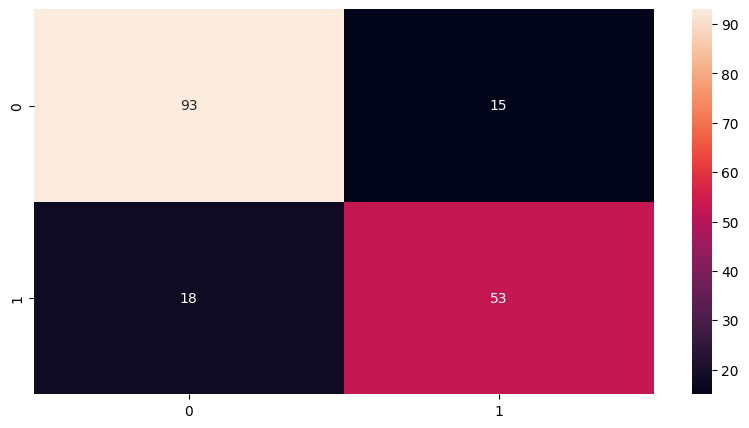

In [ ]:
x = treino
y = target

# Dividindo os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# modelo k = 5
k = KNeighborsClassifier(n_neighbors=1)

# Treinar o modelo nos dados de treinamento
k.fit(x_train, y_train)

# Previsões com os dados de testes
y_pred = k.predict(x_test)

# Validando o modelo utilizando o conjunto de teste
accuracy = str(round(accuracy_score(y_test, y_pred) * 100, 2)) + '%'
confusion_1nn = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'A acurácia do modelo 1nn foi: {accuracy}')
print("Relatório de Classificação:\n", classification_rep)
print("Matriz de Confusão")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_1nn , annot=True)

Este modelo parece ter um desempenho decente com uma acurácia de cerca de 81.56%. A matriz de confusão mostra a distribuição das predições, indicando que o modelo teve um número razoável de verdadeiros positivos e verdadeiros negativos.

## KNN

A acurácia do modelo k-nn foi: 82.12%
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       108
           1       0.80      0.73      0.76        71

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Matriz de Confusão


<Axes: >

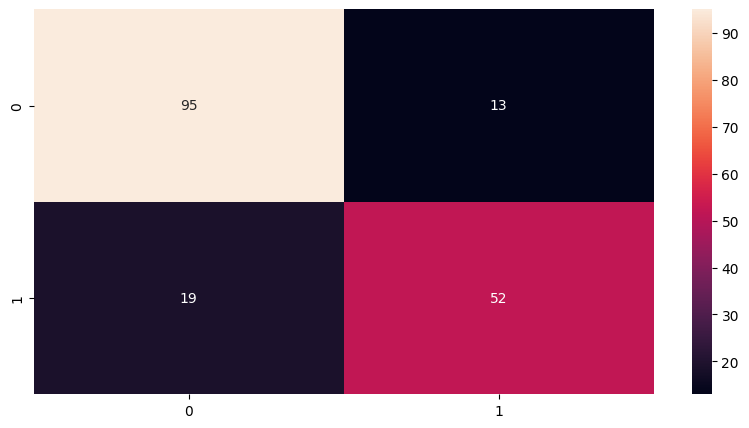

In [ ]:
x = treino
y = target

# Dividindo os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# modelo k = 5
k = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo nos dados de treinamento
k.fit(x_train, y_train)

# Previsões com os dados de testes
y_pred = k.predict(x_test)

# Validando o modelo utilizando o conjunto de teste
accuracy = str(round(accuracy_score(y_test, y_pred) * 100, 2)) + '%'
confusion_knn = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'A acurácia do modelo k-nn foi: {accuracy}')
print("Relatório de Classificação:\n", classification_rep)
print("Matriz de Confusão")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_knn , annot=True)

O modelo k-NN obteve uma acurácia ligeiramente superior à do modelo 1-NN. A matriz de confusão mostra um desempenho semelhante ao modelo 1-NN, com um número razoável de verdadeiros positivos e verdadeiros negativos. Ele tem uma boa precisão e recall para ambas as classes, resultando em um F1-Score equilibrado.

# Métodos Probabilísticos

## Gaussian

In [ ]:
x = treino
y = target

# Dividindo os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Criando modelo Gaussiano
model = GaussianNB()

# Treinando o modelo com os dados de treinamento
model.fit(x_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(x_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_G = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

A acurácia Gaussian: 0.770949720670391
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       108
           1       0.70      0.73      0.72        71

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Matriz de Confusão


<Axes: >

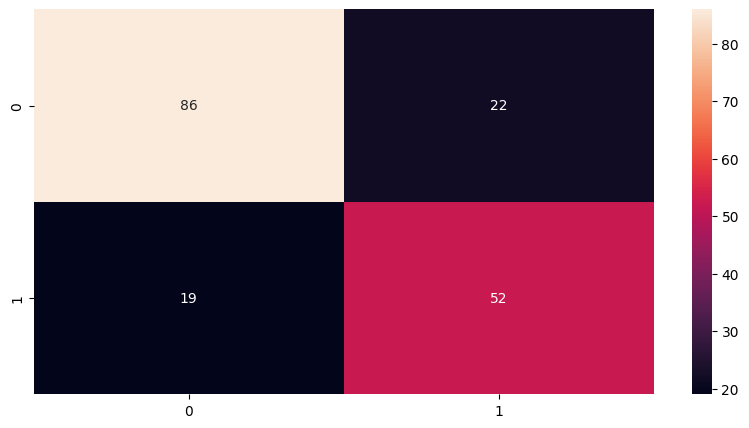

In [ ]:
print("A acurácia Gaussian:", accuracy)
print("Relatório de Classificação:\n", classification_rep)
print("Matriz de Confusão")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_G , annot=True)

O modelo Gaussian Naive Bayes teve uma acurácia de cerca de 79.33%. A matriz de confusão mostra que o modelo teve mais falsos negativos (19). Ele tem uma precisão e recall razoáveis, embora o F1-Score seja um pouco mais baixo em comparação com o modelo k-NN.

## Multinomial

In [ ]:
x = treino
y = target

# Dividindo os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# usando MinMaxScaler() para pré-processar os dados antes de enviá-los ao modelo.
# Isso normaliza para o intervalo de 0 a 1, removendo assim os números negativos.
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Criando modelo Gaussiano
model = MultinomialNB()

# Treinando o modelo com os dados de treinamento
model.fit(x_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(x_test)

# Avaliando o desempenho do modelo
accuracy_M = accuracy_score(y_test, y_pred)
confusion_M = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

A acurácia multinomial: 0.6536312849162011
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.97      0.77       108
           1       0.80      0.17      0.28        71

    accuracy                           0.65       179
   macro avg       0.72      0.57      0.53       179
weighted avg       0.70      0.65      0.58       179

Matriz de Confusão


<Axes: >

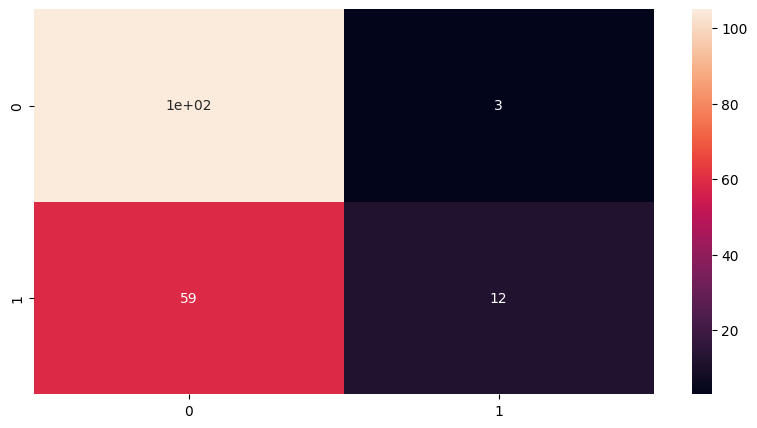

In [ ]:
print("A acurácia multinomial:", accuracy_M)
print("Relatório de Classificação:\n", classification_rep)
print("Matriz de Confusão")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_M, annot=True)

O modelo Multinomial Naive Bayes obteve uma acurácia de cerca de 65.36%. A matriz de confusão indica que este modelo teve dificuldade em identificar a classe positiva, com um grande número de falsos negativos (59). Seu desempenho é desequilibrado, com uma alta revocação para a classe 0 e uma baixa revocação para a classe 1. O F1-Score geral é afetado negativamente pela baixa revocação na classe 1.

## Bernoulli

In [ ]:
x = treino
y = target

# Dividindo os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Criando modelo Gaussiano
model = BernoulliNB()

# Treinando o modelo com os dados de treinamento
model.fit(x_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(x_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

A acurácia bernoulli: 0.7932960893854749
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       108
           1       0.77      0.68      0.72        71

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Matriz de Confusão


<Axes: >

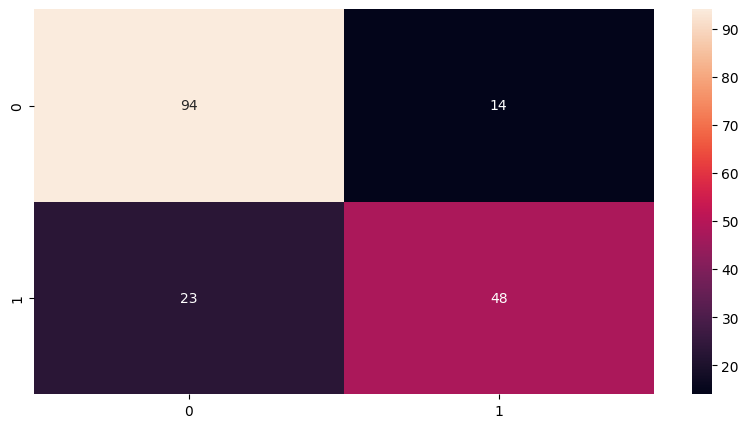

In [ ]:
print("A acurácia bernoulli:", accuracy)
print("Relatório de Classificação:\n", classification_rep)
print("Matriz de Confusão")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion, annot=True)

O modelo Bernoulli Naive Bayes obteve uma acurácia de cerca de 79.33%. A matriz de confusão mostra um número significativo de falsos negativos (23). Ele tem uma precisão e recall razoáveis, com um F1-Score equilibrado.

# Conclusão

O modelo k-NN parece ter um bom equilíbrio entre precisão e recall, resultando em um alto F1-Score geral